# openFDA API - Exploring Adverse Event Reports for Medications 
### Data from the FDA Adverse Event Reporting System (FAERS) database containing information on adverse event and medication error reports submitted to the FDA (https://open.fda.gov/apis/drug/event/)


-----



## Executive Summary


#### Benzodiazepine Analysis
The first analysis was focused on evaluating seasonality in the Benzodiazepine pharmacological class of medications.  The hypothesis is that if there is an increase in adverse event reports during certain months then maybe that is tied to a greater number of prescriptions written during that period, and perhaps a seasonal need for the medication, like greater depression and anxiety during the winter months. openFDA API was used to gather the data related to date of the adverse report (between 2015 and 2021), the patient's gender and patient's age for any reports documenting benzodiazapines as the pharmocological class of medication.

The hypothesis was that there may be a greater number of adverse events for benzodiazepines in the winter months because more of the medication is prescribed during that time, perhaps related to seasonal depression in the winter. Indeed, we found that there is an statistically significant increase in benzodiazepine adverse event reports during the winter months from 2015 - 2021 (specifically, December, January and February). And the greatest number of reports came from patients between the ages of 50-69. The patients in this age group also showed statistically significant higher adverse report counts during the same months. Although the API doesn't provide data on count of prescriptions written, it is plausible that there is a seasonality effect in benzodiazepine issuance.

#### Jamie add your "exec summary" here!






## Project Hypotheses:

### 1. Are there more adverse event reports for benzodiazepine medications during the winter months?
### 2. Jamie - Fill in your question here!

import packages/libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from datetime import datetime
import seaborn as sns
import scipy.stats as stats


### Benzodiazapine Analysis

Creating the Benzodiazepine dataset: Based on the structure of the the API, the sheer size of the database, the 1000 record limit per call, the 'count' function in the API callquery was used.  This was instead of 'paging' through the 500,000 or more records that matched the search.  The API calls for this analysis are the same with the exception of male and female, and age.  The API calls are set up to loop through each age (min to max) for males and females. The pharmalogical class of Benzodiazepine is used as search criteria, along with the years of 01/01/2015 to 10/31/2021. Then the two datasets (male and female) are combined and used for the analysis.

In [4]:
#create dictionary to hold new data
benzo = {'time':[],'benzo_count':[], 'gender':[], 'age': []}

#all ages for MALES

#loop through all ages
for age in range(0,101):
    #input age into url
    url='https://api.fda.gov/drug/event.json?search=patient.drug.openfda.pharm_class_epc.exact:"Benzodiazepine+[EPC]"+AND+patient.patientsex:"1"+AND+patient.patientonsetage:' + '"' + str(age) + '"'+'+AND+receivedate:[20150101+TO+20211001]&count=receivedate'
    #run api call
    req=requests.get(url) 
    data = req.json()
    #subset out the dataset to include only the results section
    benzo_datalist = data['results']
    #loop through the json dataset appending data associated with BENZO, MALE, AGE
    for i in range(len(benzo_datalist)):
        benzo['time'].append(benzo_datalist[i]['time'])
        benzo['benzo_count'].append(benzo_datalist[i]['count'])
        benzo['gender'].append("Male")
        benzo['age'].append(age)
        #print("processing " + str(age) + " in loop number " + str(i))   #if processing activity is needed, use this print call

In [5]:
#all ages for FEMALES

#loop through all ages
for age in range(0,101):
    #input age into url
    url='https://api.fda.gov/drug/event.json?search=patient.drug.openfda.pharm_class_epc.exact:"Benzodiazepine+[EPC]"+AND+patient.patientsex:"2"+AND+patient.patientonsetage:' + '"' + str(age) + '"'+'+AND+receivedate:[20150101+TO+20211001]&count=receivedate'
    #run api call
    req=requests.get(url) 
    data = req.json()
    #subset out the dataset to include only the results section
    benzo_datalist = data['results']
    #loop through the json dataset appending data associated with BENZO, FEMALE, AGE
    for i in range(len(benzo_datalist)):
        benzo['time'].append(benzo_datalist[i]['time'])
        benzo['benzo_count'].append(benzo_datalist[i]['count'])
        benzo['gender'].append("Female")
        benzo['age'].append(age)
        #print("processing age" + str(age) + " in loop number " + str(i))  #if processing activity is needed, use this print

Create DataFrame

In [6]:
benzo_df = pd.DataFrame.from_dict(benzo)
benzo_df.tail()

,time,benzo_count,gender,age
136126,20210331,2,Female,100
136127,20210413,1,Female,100
136128,20210511,1,Female,100
136129,20210824,1,Female,100
136130,20210831,1,Female,100


In [7]:
#convert 'time' to timedate column, create month, year columns

benzo_df['date'] = pd.to_datetime(benzo_df['time'])
benzo_df['month'] = benzo_df['date'].dt.month
benzo_df['year'] = benzo_df['date'].dt.year
benzo_df.head()

,time,benzo_count,gender,age,date,month,year
0,20150107,1,Male,0,2015-01-07,1,2015
1,20150115,1,Male,0,2015-01-15,1,2015
2,20150225,1,Male,0,2015-02-25,2,2015
3,20150305,2,Male,0,2015-03-05,3,2015
4,20150504,1,Male,0,2015-05-04,5,2015


Groupby month and year to get clean counts for graphical display

In [8]:
benzo_grp = benzo_df.groupby(["month", "year"])["benzo_count"].sum().reset_index()
benzo_grp.head()

,month,year,benzo_count
0,1,2015,2875
1,1,2016,2910
2,1,2017,3199
3,1,2018,3419
4,1,2019,4161


Using boxplots to determine the variation of the counts by month for the years evaluated

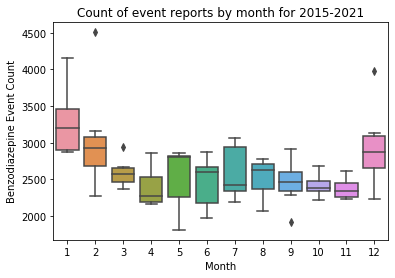

In [17]:
benzo_mo = sns.boxplot(x="month",y="benzo_count", data=benzo_grp)
plt.title('Count of event reports by month for 2015-2021')
plt.xlabel('Month')
plt.ylabel('Benzodiazepine Event Count')
plt.show()

fig = benzo_mo.get_figure()
fig.savefig('sns_benzo_mo_box.svg')

Bar chart showing total counts of adverse event reports by month for the years 2015 to 2021

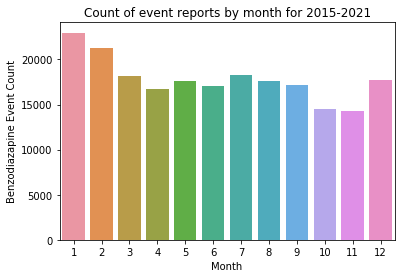

In [23]:
benzo_bar = benzo_df.groupby("month")["benzo_count"].sum().reset_index()
benzo_mo_bar = sns.barplot(x="month",y="benzo_count", data=benzo_bar, ci=None)
plt.title("Count of event reports by month for 2015-2021")
plt.xlabel("Month")
plt.ylabel("Benzodiazapine Event Count")
plt.show()

fig = benzo_mo_bar.get_figure()
fig.savefig('sns_benzo_bar_all.svg')

1-way ANOVA to determine if there is a significant difference in monthly adverse event reports (month vs. count)

In [25]:
#ANOVA 
dataset=benzo_df
stats.f_oneway(dataset['benzo_count'][dataset['month']==1],
               dataset['benzo_count'][dataset['month']==2],
               dataset['benzo_count'][dataset['month']==3],
               dataset['benzo_count'][dataset['month']==4],
               dataset['benzo_count'][dataset['month']==5],
               dataset['benzo_count'][dataset['month']==6],
               dataset['benzo_count'][dataset['month']==7],
               dataset['benzo_count'][dataset['month']==8],
               dataset['benzo_count'][dataset['month']==9],
               dataset['benzo_count'][dataset['month']==10],
               dataset['benzo_count'][dataset['month']==11],
               dataset['benzo_count'][dataset['month']==12])

F_onewayResult(statistic=92.3301052449245, pvalue=5.289617039407684e-210)

The 1-way ANOVA shows that there is a significant different among the months [F_onewayResult(statistic=92.3301052449245, pvalue=5.289617039407684e-210)] but a Post-Hoc Pair-wise Tukey test is needed to determine which months are statistically different than the rest.

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

tukey = pairwise_tukeyhsd(endog=benzo_df['benzo_count'], groups=benzo_df['month'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0035    0.9 -0.0437  0.0367  False
     1      3  -0.2126  0.001 -0.2531 -0.1721   True
     1      4  -0.2281  0.001 -0.2694 -0.1869   True
     1      5   -0.206  0.001 -0.2469 -0.1652   True
     1      6  -0.2261  0.001 -0.2672 -0.1851   True
     1      7  -0.1997  0.001 -0.2402 -0.1592   True
     1      8  -0.2006  0.001 -0.2415 -0.1597   True
     1      9  -0.1927  0.001 -0.2339 -0.1515   True
     1     10  -0.2326  0.001 -0.2755 -0.1897   True
     1     11  -0.2433  0.001 -0.2864 -0.2002   True
     1     12   -0.117  0.001 -0.1585 -0.0756   True
     2      3  -0.2091  0.001 -0.2503 -0.1678   True
     2      4  -0.2247  0.001 -0.2666 -0.1827   True
     2      5  -0.2025  0.001 -0.2442 -0.1609   True
     2      6  -0.2226  0.001 -0.2644 -0.1809   True
     2      7  -0.1962  0.001 -0.2375 -0.1549 

The results of the Pair-wise is that months 1,2,12 have statistically higher adverse event report counts than the other months. This means that **December, January, and February have statistically higher adverse events than any other months of the year.  Meaning that winter has the highest reports for the time period analyzed - 2015-2021.**

Does this pattern hold for certain age groups?  

In [27]:
#create bins
bins = [-1,9,19,29,39,49,59,69,79,101]
labels = ["<10","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80+"]

benzo_age_df = pd.cut(benzo_df['age'], bins=bins, labels=labels)

#rename column
benzo_age_df = pd.DataFrame(benzo_age_df).rename(columns={"Age":"Age_Bin"})

#join bins back into original df
benzo_join = benzo_df.join(benzo_age_df, lsuffix='_orig', rsuffix='_bin')
benzo_join.head()

benzo_age_grp = benzo_join.groupby(["age_bin", "year"])["benzo_count"].sum().reset_index()
benzo_age_grp.head()

,age_bin,year,benzo_count
0,<10,2015,500
1,<10,2016,613
2,<10,2017,605
3,<10,2018,661
4,<10,2019,663


Charting the age groups - based on the box plots, age groups 50-59 and 60-69 have the highest event reporting (and are statistically significantly higher than the other age groups).  Does this group have seasonal trends as well?  

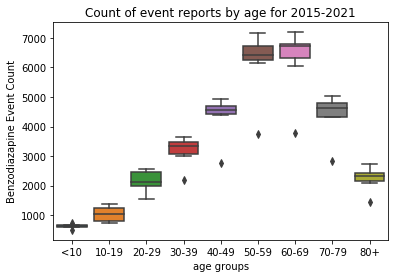

In [29]:
benzo_age_sns = sns.boxplot(x="age_bin",y="benzo_count", data=benzo_age_grp)
plt.title("Count of event reports by age for 2015-2021")
plt.xlabel("age groups")
plt.ylabel("Benzodiazapine Event Count")
plt.show()

fig = benzo_age_sns.get_figure()
fig.savefig('sns_benzo_box_age.svg')

1-way ANOVA for benzodiazapine reports for age groups 50-59 and 60-69

In [30]:
benzo5060 = benzo_join[(benzo_join['age_bin']=="50-59") | (benzo_join['age_bin']=="60-69")]
benzo5060.tail()

#ANOVA 
dataset=benzo5060
stats.f_oneway(dataset['benzo_count'][dataset['month']==1],
               dataset['benzo_count'][dataset['month']==2],
               dataset['benzo_count'][dataset['month']==3],
               dataset['benzo_count'][dataset['month']==4],
               dataset['benzo_count'][dataset['month']==5],
               dataset['benzo_count'][dataset['month']==6],
               dataset['benzo_count'][dataset['month']==7],
               dataset['benzo_count'][dataset['month']==8],
               dataset['benzo_count'][dataset['month']==9],
               dataset['benzo_count'][dataset['month']==10],
               dataset['benzo_count'][dataset['month']==11],
               dataset['benzo_count'][dataset['month']==12])


F_onewayResult(statistic=53.65979803208144, pvalue=9.684339350843523e-119)

In [31]:
tukey = pairwise_tukeyhsd(endog=benzo_df['benzo_count'], groups=benzo_df['month'], alpha=0.05)
#print(tukey)  #if you want to see the tukey table, then use this print statement.  For simplicity, it's not printed out

Statistics results - Month for these age groups (50-69 years old) is statistically significant, and the results of the pair-wise post-hoc Tukey test shows that the **same months of December, January and February have statistically higher counts of adverse event reports than other times of the year.**

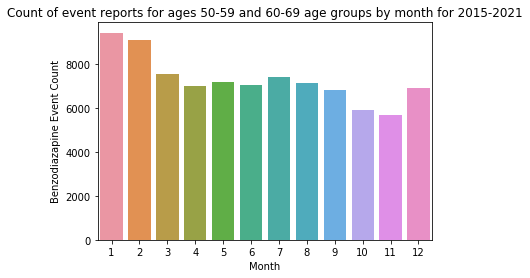

In [33]:
benzo5060_bar = benzo5060.groupby("month")["benzo_count"].sum().reset_index()
benzo_5060_mo_bar = sns.barplot(x="month",y="benzo_count", data=benzo5060_bar, ci=None)
plt.title("Count of event reports for ages 50-59 and 60-69 age groups by month for 2015-2021")
plt.xlabel("Month")
plt.ylabel("Benzodiazapine Event Count")
plt.show()

fig = benzo_5060_mo_bar.get_figure()
fig.savefig('sns_benzo_bar_age.svg')

## Jamie's section starts here

----